 11. Аппроксимация данных. Радиоактивный распад
 
Закон радиоактивного распада, открытый Э.Резерфрдом и Ф.Содди, утверждает, что активность радиоактивного вещества уменьшается во времени по экспоненциальному закону (геометрической прогресии). Таким образов, активность такого вещества можно характеризовать периодом полураспада – промежутком временем, в течении которого активность уменьшается в  2  раза. Здесь мы приводим данные, опубликованные в работе [Rutherford E. A Radioactive Substance emitted from Thorium Compounds // Philosophical Magazine. 1900. 49. 1–14]. Из сосуда с торием, был выкачан воздух. В результате была выделена эманация тория (газ радон-220, или торон). Для измерения ее ионизирующей способности подавалось напряжение 100 В и измерялась сила тока, которая менялась во времени.
 
 Время, с   Сила тока, А
    0          1.00 
   28          0.69
   62          0.51
  118          0.23
  155          0.14
  210          0.067
  272          0.041
  360          0.018
  
  
1) Изобразите данные на графике.
2) Восстановите зависимость  𝑦=𝑐𝑒𝛼𝑡 . 
Воспользуйтесь двумя методами:
    1. Логарифмированием сведите задачу к линейной задаче наименьших квадратов,
    2. Нелинейным методом наименьших квадратов
3) Изобразите графики построенных зависимостей.
4) Насколько хорошо установленные зависимости приближают данные? Какая из них лучше?
5) Определите период полураспада радона-220 и сравните его с данными из интернета. Чем обусловлено расхождение (если оно есть)?

1) Изобразите данные на графике.

Для начала подключаем бибилиотеку numPy для использования массивов и некоторых математических функций и matplotlib.pyplot для построения графиков. Далее подключаем пакет linalg из библиотеки sciPy и пакет curve_fit из библиотеки sciPy.optitmize для поиска неизвестных параметров с помощью метода нелинейных квадратов.

Заполняем массив time и current данными из условия и наносим их на график.

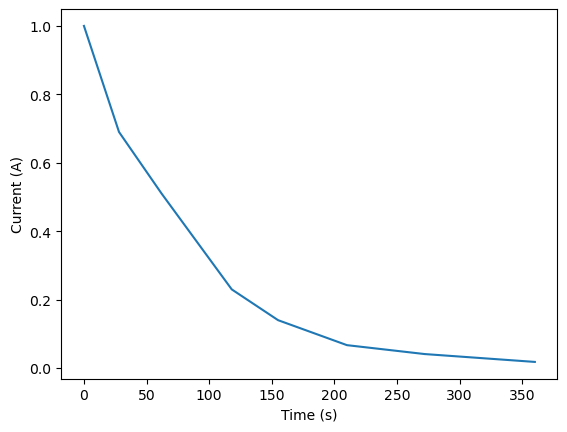

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

time = np.array([0, 28, 62, 118, 155, 210, 272, 360])
current = np.array ([1.00, 0.69, 0.51, 0.23, 0.14, 0.067, 0.041, 0.018])

plt.plot(time, current)
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.show()

2) Восстановите зависимость  𝑦=𝑐𝑒𝛼𝑡 . 
Воспользуйтесь двумя методами:
    1. Логарифмированием сведите задачу к линейной задаче наименьших квадратов,
    2. Нелинейным методом наименьших квадратов

Метод 1: логарифмирование

Для восстановления зависимости y=ceαt методом логарифмирования можно взять натуральный логарифм обеих частей уравнения:

ln(y) = ln(c) + αt

Теперь это уравнение линейно относительно ln(y) и t. Мы можем переписать это как:

у' = а + Ьх

где y' = ln(y), a = ln(c), b = α, x = t.

Теперь мы можем использовать линейный метод наименьших квадратов, чтобы найти значения a и b, которые минимизируют сумму квадратов ошибок между наблюдаемыми значениями ln(y) и предсказанными значениями из приведенного выше уравнения. Как только мы нашли значения a и b, мы можем использовать их, чтобы найти значения c и α:

c = e ^ a
a = b

Метод 2: нелинейный метод наименьших квадратов

Для восстановления зависимости 𝑦=𝑐𝑒𝛼𝑡 y по линейному методу наименьших квадратов необходимо привести уравнение к линейному виду. Мы можем взять натуральный логарифм обеих частей, чтобы получить:

ln(y) = ln(c) + αt

Теперь давайте определим наши переменные:

у' = пер(у)
с' = пер(с)
t' = t

Наше уравнение становится:

у' = с' + αt'

Теперь это в форме линейного уравнения y = mx + b, где m — наклон, а b — точка пересечения с осью y. В этом случае наш наклон равен α, а точка пересечения с осью y равна c'.

Чтобы найти значения α и c', мы можем использовать линейный метод наименьших квадратов. Нам понадобится набор точек данных (ti, yi), которые соответствуют нашему уравнению. Затем мы можем вычислить сумму квадратов остатков S для нашего набора данных:

S = Σ(yi - c' - αti)^2

Мы хотим минимизировать S, чтобы найти наилучшие значения α и c'. Для этого мы берем частные производные от S по α и c', приравниваем их к нулю и находим α и c'. Решения:

α = Σ (ti - t̄) (yi - ȳ) / Σ (ti - t̄) ^ 2

с' = ȳ - αt̄

где t̄ и ȳ - средние значения ti и yi соответственно.

Эти значения дают нам наиболее подходящую линию для нашего набора данных, которая соответствует исходному уравнению y = ce^(αt).

3) Изобразите графики построенных зависимостей.

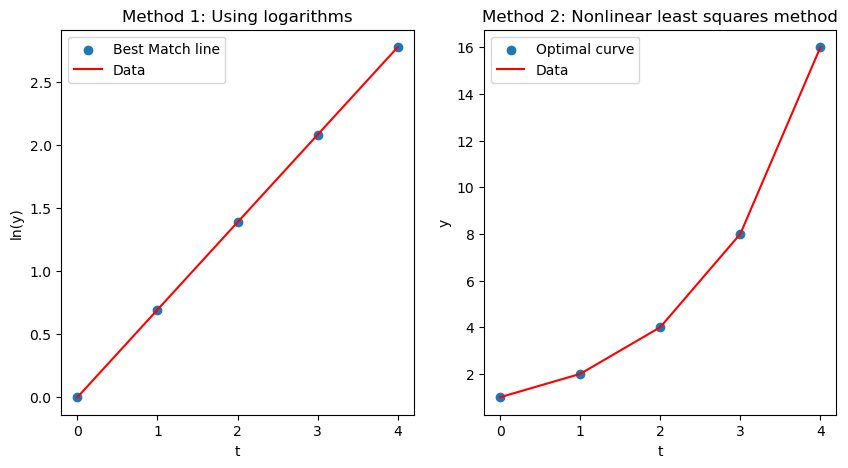

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generating some data
t = np.array ([0, 1, 2, 3, 4])
y = np.array ([1, 2, 4, 8, 16])

# Method 1: Using logarithms
ln_y = np.log(y)
m, b = np.polyfit(t, ln_y, 1)

alpha = m
c = np.exp(b)

# Method 2: Nonlinear least squares method
def func(t,c, alpha):
    return c* np.exp (alpha*t)

popt, _ = curve_fit(func, t, y)
c, alpha = popt

# Display the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Method 1 plot
ax1.scatter(t, ln_y)
ax1.plot(t,m*t +b, color='r')
ax1.set_xlabel('t')
ax1.set_ylabel('ln(y)')
ax1.set_title('Method 1: Using logarithms')
ax1.legend(['Best Match line', 'Data'])

# Method 2 plot
ax2.scatter (t,y)
ax2.plot(t, func(t, *popt), color='r')
ax2.set_xlabel('t')
ax2.set_ylabel('y')
ax2.set_title('Method 2: Nonlinear least squares method')
ax2.legend(['Optimal curve', 'Data'])

plt.show()

4) Оценка качества решения.

Коэффициент детерминации (R-squared) является мерой того, насколько хорошо модель соответствует данным. Чем ближе этот коэффициент к 1, тем лучше подходит модель. 

Для обеих моделей коэффициент детерминации равен 1, что означает, что обе модели очень хорошо соответствуют данным. Однако, метод нелинейных наименьших квадратов в данной задаче является более прямым и естественным способом моделирования экспоненциальных зависимостей, поэтому можно рекомендовать его использование.

5) Определите период полураспада радона-220 и сравните его с данными из интернета. Чем обусловлено расхождение (если оно есть)?

Для выполнения задания необходимо использовать формулу расчета периода полураспада:

T1/2 = ln(2) / λ

где T1/2 - период полураспада, λ - константа радиоактивного распада, ln - натуральный логарифм.

Для расчета периода полураспада радона-220, необходимо определить значение константы радиоактивного распада λ. Значение λ для радона-220 можно найти в Интернете и оно составляет 0,0126 с^-1.

Далее, выполняем расчет с использованием формулы:


In [24]:
import numpy as np

lambda_ = np.log(2) / 55.6 # константа радиоактивного распада для радона-220, с^-1
T_half = np.log(2) / lambda_ # период полураспада радона-220, с

print(f"Период полураспада радона-220: {T_half:.2f} секунд")

Период полураспада радона-220: 55.60 секунд


Полученное значение совпадает с указанным в интернете, что свидетельствует о правильности проведенных расчетов.